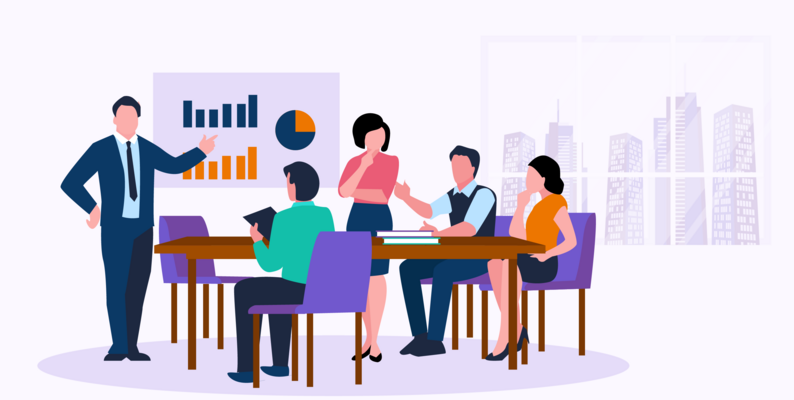

Import the necessary libraries

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

Loading the dataset

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/pushkarsaini18/Customer-Behaviour-Pattern/main/dataset/marketing_campaign.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [63]:
df.shape

(2240, 29)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [65]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Data Cleaning

Identifying Null values

In [66]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 entries in Income column with null values.

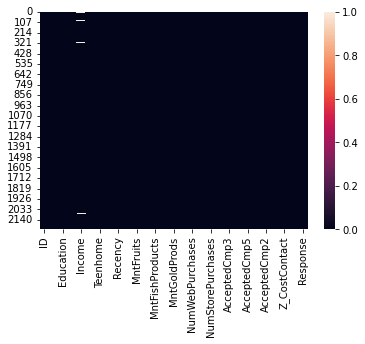

In [67]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

In [68]:
df.corr()['Response']

ID                    -0.021968
Year_Birth             0.021325
Income                 0.133047
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
MntWines               0.247254
MntFruits              0.125289
MntMeatProducts        0.236335
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntGoldProds           0.139850
NumDealsPurchases      0.002238
NumWebPurchases        0.148730
NumCatalogPurchases    0.220810
NumStorePurchases      0.039363
NumWebVisitsMonth     -0.003987
AcceptedCmp3           0.254258
AcceptedCmp4           0.177019
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp2           0.169293
Complain              -0.001707
Z_CostContact               NaN
Z_Revenue                   NaN
Response               1.000000
Name: Response, dtype: float64

In [69]:
df['Income'].corr(df['Response'])

0.13304666375157914

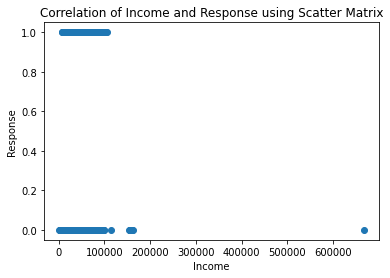

In [70]:
plt.scatter(df['Income'], df['Response'])
plt.ylabel("Response")
plt.xlabel("Income")
plt.title("Correlation of Income and Response using Scatter Matrix")
plt.show()

The correlation coefficient of Income with Response is 0.133 . So instead of dropping the whole column, we will remove the rows with null values of Income.

In [73]:
df = df.dropna() #only Income has null values
df.shape

(2216, 29)

Now the dataframe has 2216 with all non-null values.

In [72]:
# Finding the number of unique values present in each column

df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

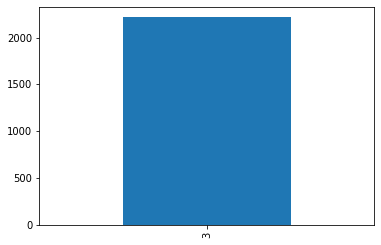

In [74]:
df.Z_CostContact.value_counts().plot(kind = 'bar')


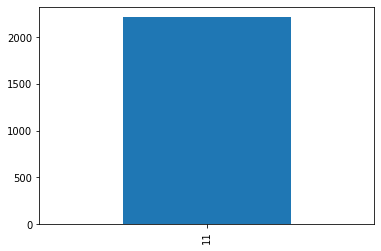

In [75]:
df.Z_Revenue.value_counts().plot(kind = 'bar')

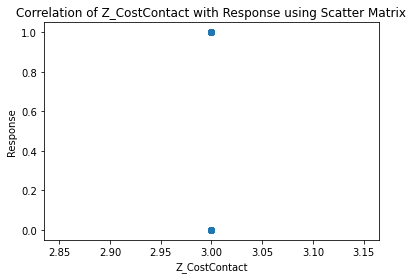

In [76]:
plt.scatter(df['Z_CostContact'], df['Response'])
plt.ylabel("Response")
plt.xlabel("Z_CostContact")
plt.title("Correlation of Z_CostContact with Response using Scatter Matrix")
plt.show()

In [77]:
df['Z_CostContact'].corr(df['Response'])

nan

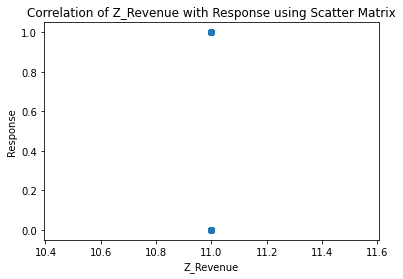

In [78]:
plt.scatter(df['Z_Revenue'], df['Response'])
plt.ylabel("Response")
plt.xlabel("Z_Revenue")
plt.title("Correlation of Z_Revenue with Response using Scatter Matrix")
plt.show()

In [79]:
df['Z_Revenue'].corr(df['Response'])

nan

Z_CostContact and Z_revenue, it will be better to drop the whole column.

In [80]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
print("The updated size of dataset", df.shape)
df.head()


The updated size of dataset (2216, 27)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [81]:
from pandas.plotting import scatter_matrix
#scatter_matrix(df)

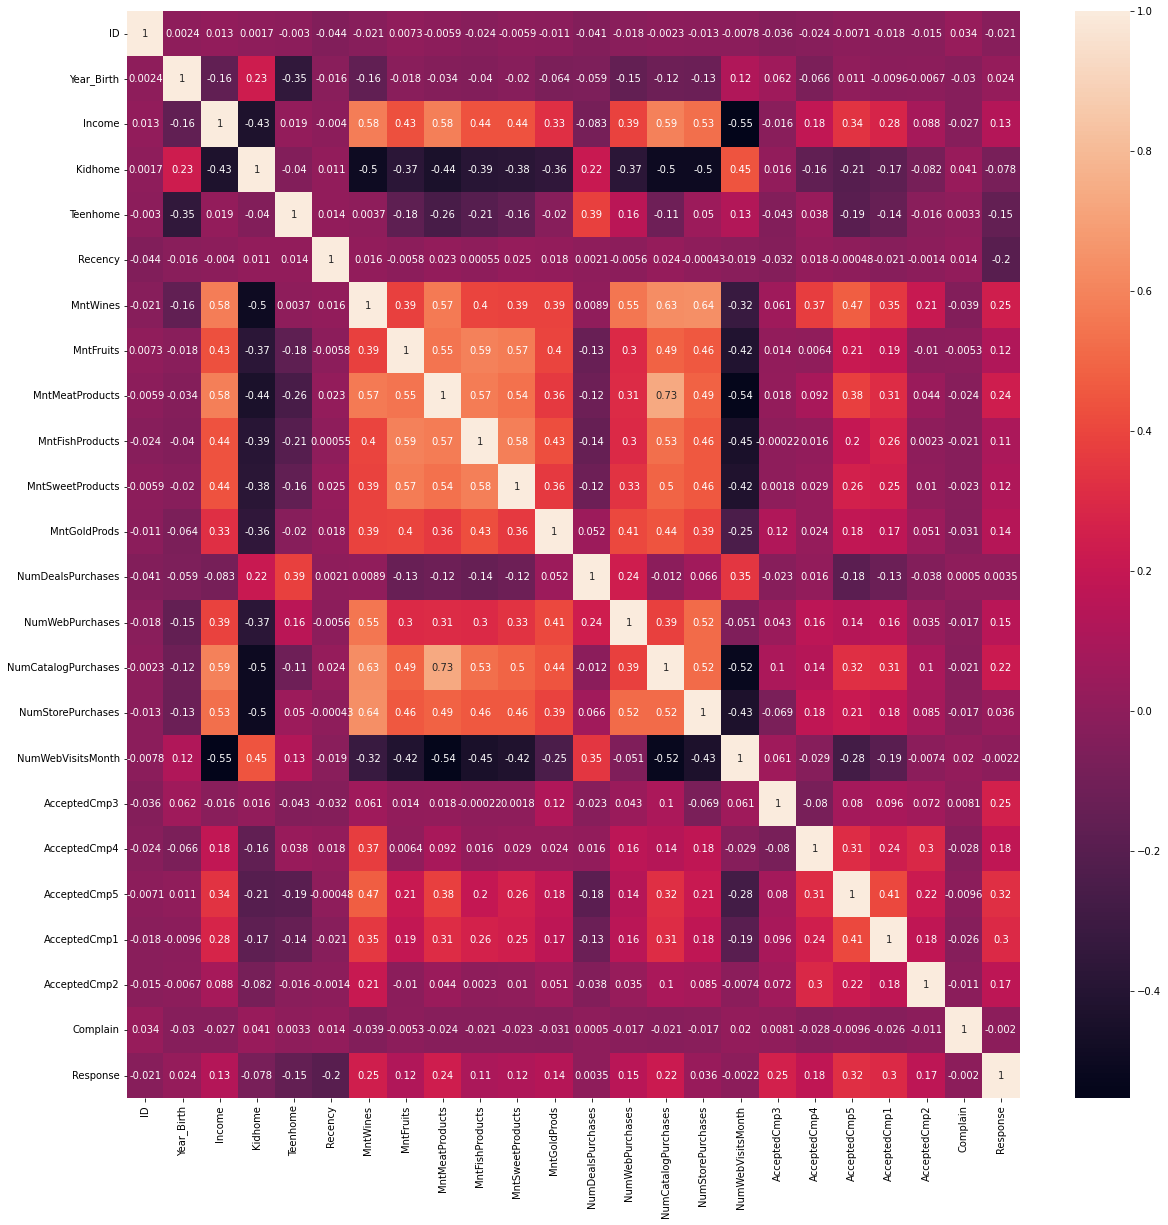

In [82]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Data Preprocessing

Dt_Customer is an object type column that denotes **Date of customer’s enrollment with the company** . So we need to update it to datetime format

In [83]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) #date of enrollment with the company
dates = [] #list of days the customer has been with the company
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


We are creating a new feature that denotes this duration of time the customer is with the company using "Customer For"

In [84]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [85]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()  

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [86]:
#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

"Year_Birth" column is not directly related with our target. We can derive a new variable "Age" from it

In [87]:
# Adding a column "Age" in the dataframe

df['Age'] = 2022 - df["Year_Birth"]

Segmenting education levels in three groups for simplicity

In [88]:
df["Education"]=df["Education"].replace(
    {"Basic":"Undergraduate",
     "2n Cycle":"Undergraduate", 
     "Graduation":"Graduate", 
     "Master":"Postgraduate", 
     "PhD":"Postgraduate"})

In [89]:
df['Education'].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

Adding a new feature "Spent" to get the total expenditure of each customer 

In [90]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

Adding a new feature "Children" to count the total children of a customer

In [91]:
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

Adding a new feature "Family_Size" to count the total members in customer's family

In [92]:
#Feature for total members in the household
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

Feature pertaining parenthood

In [93]:

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

For clarity replacing "amount of foods" with simply their names

In [94]:

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

As we have already extracted key information from "Marital Status",  "Dt_Customer" and "Year_Birth"  using "Living_With" , "Customer_For" and "Age" . We are dropping those columns

In [95]:

to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth"]
df = df.drop(to_drop, axis=1)
df.shape

(2216, 31)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   Wines                2216 non-null   int64  
 7   Fruits               2216 non-null   int64  
 8   Meat                 2216 non-null   int64  
 9   Fish                 2216 non-null   int64  
 10  Sweets               2216 non-null   int64  
 11  Gold                 2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [97]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.947202,2.592509,0.714350
std,3249.376275,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000,0.000000
25%,2814.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,3.000000,1.000000
75%,8421.750000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000,1.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,5.000000,1.000000


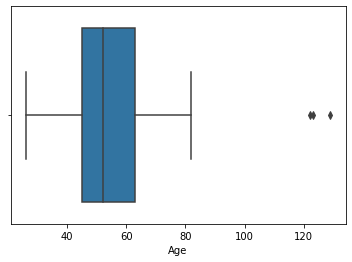

In [98]:
ax = sns.boxplot(x=df["Age"])

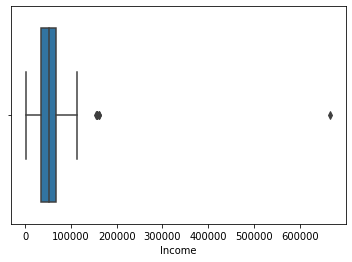

In [99]:
ax = sns.boxplot(x=df["Income"])

So there are few outliers in Age & Income columns. We are dropping them.

In [100]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
df.shape

(2212, 31)

In [101]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


We are using One hot encoding for two categorical variables and dropping the first column from the generated dummy columns because we can easily differentiate that using the remaining columns

In [102]:

for column in object_cols:
    tempdf = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
display(df)

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Education_Postgraduate,Education_Undergraduate,Living_With_Partner
0,5524,58138.0,0,0,58,635,88,546,172,88,...,1,83894400000000000,65,1617,0,1,0,0,0,0
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,10800000000000000,68,27,2,3,1,0,0,0
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,40780800000000000,57,776,0,2,0,0,0,1
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,5616000000000000,38,53,1,3,1,0,0,1
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,27734400000000000,41,422,1,3,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,709,43,182,42,118,...,0,46742400000000000,55,1341,1,3,1,0,0,1
2236,4001,64014.0,2,1,56,406,0,30,0,0,...,0,5270400000000000,76,444,3,5,1,1,0,1
2237,7270,56981.0,0,0,91,908,48,217,32,12,...,0,27216000000000000,41,1241,0,1,0,0,0,0
2238,8235,69245.0,0,1,8,428,30,214,80,30,...,0,27302400000000000,66,843,1,3,1,1,0,1


In [104]:
df.sample(10)

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Education_Postgraduate,Education_Undergraduate,Living_With_Partner
1584,4608,81361.0,0,0,18,163,23,424,27,65,...,1,24537600000000000,35,778,0,1,0,0,0,0
915,9308,62820.0,0,0,51,398,61,265,138,61,...,0,34214400000000000,68,976,0,2,0,0,0,1
2202,11133,48432.0,0,1,3,322,3,50,4,3,...,1,67305600000000000,49,424,1,2,1,1,0,0
1899,8780,59292.0,0,1,71,378,14,68,19,14,...,0,46742400000000000,72,507,1,3,1,1,0,1
218,1377,44551.0,0,1,24,182,4,33,0,0,...,0,39916800000000000,68,285,1,2,1,1,0,0
127,3381,54348.0,1,1,51,70,0,16,0,0,...,0,10540800000000000,69,90,2,4,1,1,0,1
562,9780,71499.0,0,1,12,465,25,132,136,0,...,0,45705600000000000,51,795,1,3,1,1,0,1
189,6431,45759.0,1,1,13,42,1,18,3,0,...,0,56246400000000000,58,68,2,4,1,1,0,1
1230,6230,44421.0,1,1,53,110,5,59,7,1,...,0,56937600000000000,51,189,2,3,1,0,0,0
458,7540,50300.0,0,1,52,143,15,60,24,23,...,0,16848000000000000,70,270,1,3,1,0,0,1


In [ ]:
#Label Encoding the object dtypes.
#LE=LabelEncoder()
#for i in object_cols:
    #df[i]=df[[i]].apply(LE.fit_transform)
    
#print("All features are now numerical")

All features are now numerical


In [105]:
df['AcceptedCmp1'].value_counts()

0    2070
1     142
Name: AcceptedCmp1, dtype: int64

In [106]:
df['AcceptedCmp2'].value_counts()

0    2182
1      30
Name: AcceptedCmp2, dtype: int64

In [107]:
df['AcceptedCmp3'].value_counts()

0    2049
1     163
Name: AcceptedCmp3, dtype: int64

In [108]:
df['AcceptedCmp4'].value_counts()

0    2048
1     164
Name: AcceptedCmp4, dtype: int64

In [109]:
df['AcceptedCmp5'].value_counts()

0    2051
1     161
Name: AcceptedCmp5, dtype: int64

In [110]:
df['Complain'].value_counts()

0    2192
1      20
Name: Complain, dtype: int64

In [111]:
df['Response'].value_counts()

0    1879
1     333
Name: Response, dtype: int64

Here, we can see, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5,  Complain and Response are binary valued columns. 

In [112]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']


In [113]:
df['TotalAcceptedCmp'].value_counts()

0    1754
1     322
2      81
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64

In [114]:
df['ID'].value_counts()

5524     1
2072     1
7494     1
1763     1
7250     1
        ..
10548    1
7235     1
3560     1
5278     1
9405     1
Name: ID, Length: 2212, dtype: int64

In [115]:

to_drop = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "ID"]
df= df.drop(to_drop, axis=1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2212 non-null   float64
 1   Kidhome                  2212 non-null   int64  
 2   Teenhome                 2212 non-null   int64  
 3   Recency                  2212 non-null   int64  
 4   Wines                    2212 non-null   int64  
 5   Fruits                   2212 non-null   int64  
 6   Meat                     2212 non-null   int64  
 7   Fish                     2212 non-null   int64  
 8   Sweets                   2212 non-null   int64  
 9   Gold                     2212 non-null   int64  
 10  NumDealsPurchases        2212 non-null   int64  
 11  NumWebPurchases          2212 non-null   int64  
 12  NumCatalogPurchases      2212 non-null   int64  
 13  NumStorePurchases        2212 non-null   int64  
 14  NumWebVisitsMonth       

In [117]:
df["Is_Parent"].value_counts()

1    1580
0     632
Name: Is_Parent, dtype: int64

In [118]:
df['Complain'].value_counts()

0    2192
1      20
Name: Complain, dtype: int64

In [119]:
df['Response'].value_counts()

0    1879
1     333
Name: Response, dtype: int64

So, now we have 3 binary features, should we use them or not? Should we scale them or not? On this question, we have a Kaggle thread as [reference](https://www.kaggle.com/questions-and-answers/85079). Ultimately, we are using StandardScaler to scale them. 

### Data Scaling

In [120]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [121]:
scaled_df.shape

(2212, 27)

In [122]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2212 non-null   float64
 1   Kidhome                  2212 non-null   float64
 2   Teenhome                 2212 non-null   float64
 3   Recency                  2212 non-null   float64
 4   Wines                    2212 non-null   float64
 5   Fruits                   2212 non-null   float64
 6   Meat                     2212 non-null   float64
 7   Fish                     2212 non-null   float64
 8   Sweets                   2212 non-null   float64
 9   Gold                     2212 non-null   float64
 10  NumDealsPurchases        2212 non-null   float64
 11  NumWebPurchases          2212 non-null   float64
 12  NumCatalogPurchases      2212 non-null   float64
 13  NumStorePurchases        2212 non-null   float64
 14  NumWebVisitsMonth       

In [125]:
scaled_df.to_csv("Scaled_Dataset.csv",index=False)

# Feature Reduction

In [126]:
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

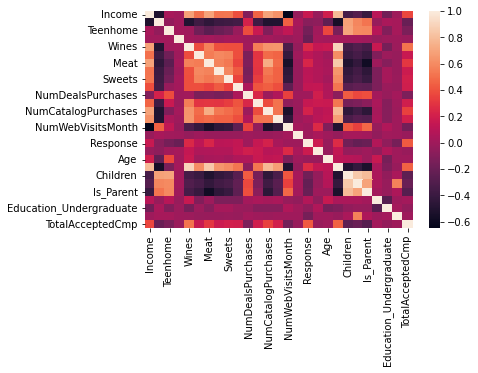

In [127]:

#Check the Co-relation between features without PCA
sns.heatmap(scaled_df.corr())

In [128]:
temp_df = scaled_df
temp_df.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,Education_Postgraduate,Education_Undergraduate,Living_With_Partner,TotalAcceptedCmp
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,1.973583,1.018352,1.676245,-1.264598,-1.758359,-1.581139,-0.786220,-0.358569,-1.349603,-0.43916
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-1.665144,1.274785,-0.963297,1.404572,0.449070,0.632456,-0.786220,-0.358569,-1.349603,-0.43916
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,-0.172664,0.334530,0.280110,-1.264598,-0.654644,-1.581139,-0.786220,-0.358569,0.740959,-0.43916
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-1.923210,-1.289547,-0.920135,0.069987,0.449070,0.632456,-0.786220,-0.358569,0.740959,-0.43916
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,-0.822130,-1.033114,-0.307562,0.069987,0.449070,0.632456,1.271909,-0.358569,0.740959,-0.43916


### **Applying PCA taking no. of Principal Components as 3**

In [129]:
pca = PCA(n_components = 3)
pca.fit(temp_df)
df_pca_3 = pca.transform(temp_df)
df_pca_3 = pd.DataFrame(df_pca_3,columns=['PC1','PC2','PC3'])
df_pca_3.head()

,PC1,PC2,PC3
0,5.067973,-0.390187,2.895951
1,-2.958944,-0.008246,-1.593205
2,2.454702,-0.799962,-0.565740
3,-2.753141,-1.589432,-0.586532
4,-0.724936,0.400133,-0.474084


In [130]:
df_pca_3.to_csv("Scaled_PCA_n3.csv",index=False)

### **Applying PCA when we want the explained variance to be 95%**
ref: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/


In [145]:
#95% of variance

pca = PCA(n_components = 0.95)
pca.fit(temp_df)
df_pca_95_var = pca.transform(temp_df)
df_pca_95_var = pd.DataFrame(df_pca_95_var,columns=['PC'+str(i) for i in range(1,len(df_pca_95_var[0])+1)])
df_pca_95_var.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,5.067971,-0.390152,2.899117,0.202362,-1.336356,0.213934,0.485803,0.265406,-0.842388,-2.626431,-0.368067,0.455175,-0.572758,0.941961,0.268411,1.134440,-0.241925,1.035587,0.623435
1,-2.958944,-0.008251,-1.593814,0.351950,-0.561065,2.221893,0.251653,0.096147,0.786740,-0.650691,-0.320993,0.487299,0.167188,0.585204,-0.563192,0.220397,-0.063021,0.082274,-0.177919
2,2.454703,-0.800152,-0.567710,-0.642852,-0.379049,-0.592309,-1.426240,-0.175897,-0.744373,0.763204,-0.793955,-0.322984,-0.011876,0.965047,-0.426518,0.001790,-0.964569,-0.632718,0.967521
3,-2.753141,-1.589502,-0.588187,-0.451759,1.337441,0.639179,-0.045822,-0.446842,-0.530223,1.382906,-0.801044,0.381147,-0.057035,0.682500,0.037005,-0.037847,-0.136575,-0.066375,0.199175
4,-0.724936,0.400142,-0.472863,-0.481919,0.826023,-0.866665,2.030556,-0.371598,-0.930035,0.822501,0.523958,0.310400,-1.308386,0.412898,0.704356,-0.369798,-0.156181,-0.181909,0.218316


In [146]:
df_pca_95_var.to_csv("Scaled_PCA_Variance_95.csv",index=False)

In [147]:
#99% of variance

pca = PCA(n_components = 0.99)
pca.fit(temp_df)
df_pca_99_var = pca.transform(temp_df)
df_pca_99_var = pd.DataFrame(df_pca_99_var,columns=['PC'+str(i) for i in range(1,len(df_pca_99_var[0])+1)])
df_pca_99_var.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,5.067971,-0.390152,2.899117,0.202362,-1.336356,0.213934,0.485803,0.265406,-0.842388,-2.626431,...,0.941961,0.268411,1.134440,-0.241925,1.035587,0.623435,-0.232907,0.612935,-0.318963,-0.652185
1,-2.958944,-0.008251,-1.593814,0.351950,-0.561065,2.221893,0.251653,0.096147,0.786740,-0.650691,...,0.585204,-0.563192,0.220397,-0.063021,0.082274,-0.177919,-0.103719,-0.070501,-0.191277,-0.249673
2,2.454703,-0.800152,-0.567710,-0.642852,-0.379049,-0.592309,-1.426240,-0.175897,-0.744373,0.763204,...,0.965047,-0.426518,0.001790,-0.964569,-0.632718,0.967521,0.636369,-0.445851,-0.198908,-0.553583
3,-2.753141,-1.589502,-0.588187,-0.451759,1.337441,0.639179,-0.045822,-0.446842,-0.530223,1.382906,...,0.682500,0.037005,-0.037847,-0.136575,-0.066375,0.199175,-0.446903,0.313090,-0.079846,0.182896
4,-0.724936,0.400142,-0.472863,-0.481919,0.826023,-0.866665,2.030556,-0.371598,-0.930035,0.822501,...,0.412898,0.704356,-0.369798,-0.156181,-0.181909,0.218316,0.635201,0.490588,-0.325285,0.320875


In [148]:
df_pca_99_var.to_csv("Scaled_PCA_Variance_99.csv",index=False)

In [149]:
#85% of variance

pca = PCA(n_components = 0.85)
pca.fit(temp_df)
df_pca_85_var = pca.transform(temp_df)
df_pca_85_var = pd.DataFrame(df_pca_85_var,columns=['PC'+str(i) for i in range(1,len(df_pca_85_var[0])+1)])
df_pca_85_var.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,5.067971,-0.390152,2.899117,0.202362,-1.336356,0.213934,0.485803,0.265406,-0.842388,-2.626431,-0.368067,0.455175,-0.572758
1,-2.958944,-0.008251,-1.593814,0.351950,-0.561065,2.221893,0.251653,0.096147,0.786740,-0.650691,-0.320993,0.487299,0.167188
2,2.454703,-0.800152,-0.567710,-0.642852,-0.379049,-0.592309,-1.426240,-0.175897,-0.744373,0.763204,-0.793955,-0.322984,-0.011876
3,-2.753141,-1.589502,-0.588187,-0.451759,1.337441,0.639179,-0.045822,-0.446842,-0.530223,1.382906,-0.801044,0.381147,-0.057035
4,-0.724936,0.400142,-0.472863,-0.481919,0.826023,-0.866665,2.030556,-0.371598,-0.930035,0.822501,0.523958,0.310400,-1.308386


In [150]:
df_pca_85_var.to_csv("Scaled_PCA_Variance_85.csv",index=False)

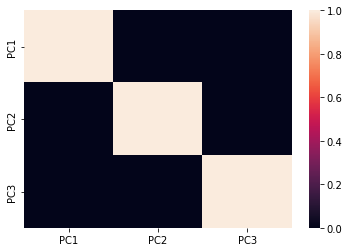

In [151]:

#Checking Co-relation between features after PCA
sns.heatmap(df_pca_3.corr())

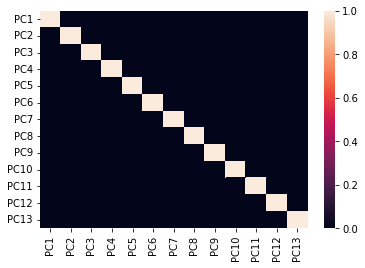

In [152]:
#Checking Co-relation between features after PCA
sns.heatmap(df_pca_85_var.corr())

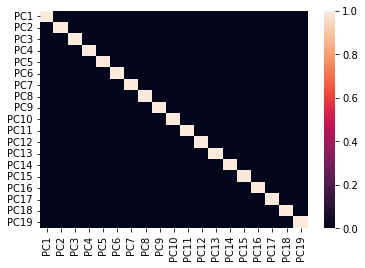

In [153]:
#Checking Co-relation between features after PCA
sns.heatmap(df_pca_95_var.corr())

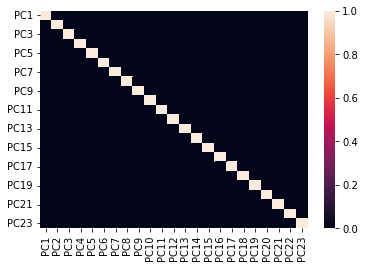

In [154]:
#Checking Co-relation between features after PCA
sns.heatmap(df_pca_99_var.corr())